<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Project - Analysis on Unicorn Companies
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Data Dictionary

 The Data set contains 1221 observations of Unicorn companies. Corresponding to each Company,data of other variables is available on which the analysis going to be done.

## About the dataset

**Unnamed::** Serial Number

**Company:** Name of the company who register as unicorn

**Valuation** Current Valuation of the company in Billion Dollar

**Date Joined:** date on which the Company joined in this list

**Country:** Country in which company established

**City:** City in which company established

**Industry:** Industry Type

**Select Investors:** Investors those invest in the company

## Table Of Content


1. **[Import Libraries](#lib)**


2. **[Data Preparation](#data)**
   - 2.1 - **[Read the Data](#read)**
   - 2.2 - **[check the shape](#shape)**
   - 2.3 - **[Displaying columns](#col)**
   - 2.4 - **[Removing unncessary columns](#uncol)**
   - 2.5 - **[check for datatype](#dtype)**
   - 2.6 - **[check overall statistics of data](#stats)**
   - 2.7 - **[null value treatment](#null)**
   - 2.8 - **[information regarding dataset](#info)**
   
   
3. **[Exploratory Data Analysis](#EDA)**
   

<a id="lib"></a>
## 1.  Import Libraries

In [1]:
# import necessary libraries

#import pandas
import pandas as pd

#import numpy
import numpy as np

#import matplotlib
import matplotlib.pyplot as plt

#to supress warnings
from warnings import filterwarnings
filterwarnings("ignore")

#import datetime
import datetime as dt

<a id="data"></a>
## 2. Data Preparation

<a id="read"></a>
### 2.1 Read Dataset

In [2]:
#load dataset and read first five rows of dataset
unicorn_df = pd.read_csv("unicorn_startup_companies.csv")
unicorn_df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$66,7/3/2018,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."


<a id="shape"></a>
### 2.2 Shape

In [3]:
#check shape of dataset
unicorn_df.shape

(1221, 8)

**Interpretation**:
 - Data has 1221 rows and 8 columns

<a id="col"></a>
### 2.3 Display columns

In [4]:
#displaying all columns
unicorn_df.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

**Interpretation**:
- Here we have one unknown column named Unnamed:0 so we will remove it

<a id="uncol"></a>
### 2.4 Removing Unnecessary Columns

In [5]:
#removing unnecessary column
unicorn_df = unicorn_df.drop(columns=["Unnamed: 0"])

<a id="dtype"></a>
### 2.5 Check For DataType

In [6]:
#check for datatype
unicorn_df.dtypes

Company             object
Valuation ($B)      object
Date Joined         object
Country             object
City                object
Industry            object
Select Investors    object
dtype: object

**Interpretation**:
- Here all columns are in object datatype but valuation and date columns are in wrong dataype so we change them

In [7]:
#changing valuation datatype
#removing "$" sign to convert it into numeric datatype
unicorn_df["Valuation ($B)"] = unicorn_df["Valuation ($B)"].str.replace("$"," ")

#convert it to numeric datatype using to_numeric method
unicorn_df["Valuation ($B)"]=pd.to_numeric(unicorn_df["Valuation ($B)"])

In [8]:
#converting datetime column to datetime datatype
unicorn_df["Date Joined"] = pd.to_datetime(unicorn_df["Date Joined"])

<a id="stats"></a>
### 2.6 Check Overall Statistics of data

In [9]:
#check distribution of data
unicorn_df.describe()

,Valuation ($B)
count,1221.000000
mean,3.134234
std,8.458077
min,1.000000
25%,1.100000
50%,1.580000
75%,3.000000
max,225.000000


<a id="null"></a>
### 2.7 Null value Treatment

In [10]:
#checking for null values
unicorn_df.isnull().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                18
Industry             0
Select Investors     2
dtype: int64

**Interpretation**:
- Here columns City and Select Investors have null values so we remove them

In [11]:
#check for rows that have null values
unicorn_df[unicorn_df.isnull().any(axis=1)]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
239,HyalRoute,3.50,2020-05-26,Singapore,NaN,Industrials,Kuang-Chi
313,Amber Group,3.00,2021-06-21,Hong Kong,NaN,Financial Services,"Tiger Global Management, Tiger Brokers, DCM Ve..."
343,Moglix,2.60,2021-05-17,Singapore,NaN,Industrials,"Jungle Ventures, Accel, Venture Highway"
371,Coda Payments,2.50,2022-04-15,Singapore,NaN,Financial Services,"GIC. Apis Partners, Insight Partners"
488,Advance Intelligence Group,2.00,2021-09-23,Singapore,NaN,Financial Services,"Vision Plus Capital, GSR Ventures, ZhenFund"
500,Trax,2.00,2019-07-22,Singapore,NaN,Consumer & Retail,"Hopu Investment Management, Boyu Capital, DC T..."
534,Scroll,1.80,2023-03-14,Seychelles,NaN,Financial Services,"OKX Ventures, Sequoia Capital China, IOSG"
559,Kredivo Holdings,1.66,2022-08-15,Singapore,NaN,Financial Services,"Jungle Ventures, Square Peg Capital, OpenSpace..."
617,bolttech,1.50,2021-07-01,Singapore,NaN,Insurance,"Mundi Ventures, Doqling Capital Partners, Acti..."
892,Carousell,1.10,2021-09-15,Singapore,NaN,Consumer & Retail,"500 Global, Rakuten Ventures, Golden Gate Vent..."


In [12]:
#fillin null values according to country
unicorn_df["City"]=unicorn_df["City"].fillna(unicorn_df["Country"])

In [13]:
#drop remaining nullvalues
unicorn_df.dropna(inplace=True)

<a id="info"></a>
### 2.8 Information regarding dataset

In [14]:
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 0 to 1220
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1219 non-null   object        
 1   Valuation ($B)    1219 non-null   float64       
 2   Date Joined       1219 non-null   datetime64[ns]
 3   Country           1219 non-null   object        
 4   City              1219 non-null   object        
 5   Industry          1219 non-null   object        
 6   Select Investors  1219 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 76.2+ KB


**Interpretation**:
- Dataset has 1219 rows and 7 columns
- Dataset has 1 numerical and 5 categorical columns and also one datetime column
    
    

In [15]:
#renaming columns
unicorn_df = unicorn_df.rename(columns={"Valuation ($B)":"Valuation","Select Investors":"Investors"})

<a id="EDA"></a>
## 3. Exploratory Data Analysis

In [16]:
#top five companies with highest valuation
value = unicorn_df.sort_values(by="Valuation",ascending=False).head()
value

,Company,Valuation,Date Joined,Country,City,Industry,Investors
0,ByteDance,225.0,2017-04-07,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,137.0,2012-12-01,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,66.0,2018-07-03,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,50.0,2014-01-23,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."


**Interpretation**:
- Here Top 5 companies which has highest valuation are

    1) ByteDance with valuation of 225$
    
    2)SpaceX with valuation of 137$
    
    3)SHEIN with valuation of 66$
    
    4)Stripe with valuation of 50$
    
    5)Canva with valuation of 40$

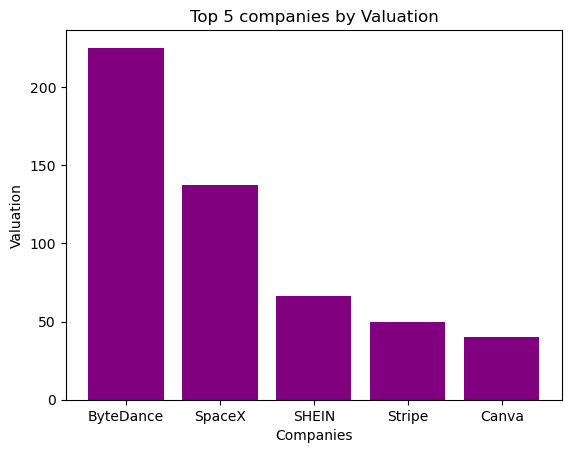

In [17]:
#plotting barchart for top five companies with highest valuation
plt.bar(unicorn_df["Company"].head(),value["Valuation"].head(),color = "purple")
plt.title("Top 5 companies by Valuation")
plt.xlabel("Companies")
plt.ylabel("Valuation")
plt.show()

**Interpretation**:
- Here ByteDance company has highest valuation

In [18]:
#finding average valuation in Each Industry
avg_valuation=unicorn_df.groupby("Industry")["Valuation"].mean()
avg_valuation

Industry
Consumer & Retail             2.929535
Enterprise Tech               2.813541
Financial Services            3.283302
Healthcare & Life Sciences    2.306066
Industrials                   3.232540
Insurance                     2.141852
Media & Entertainment         6.148272
Name: Valuation, dtype: float64

**Interpretation**:
- Media&Entertainment has highest average Valuation among all industries

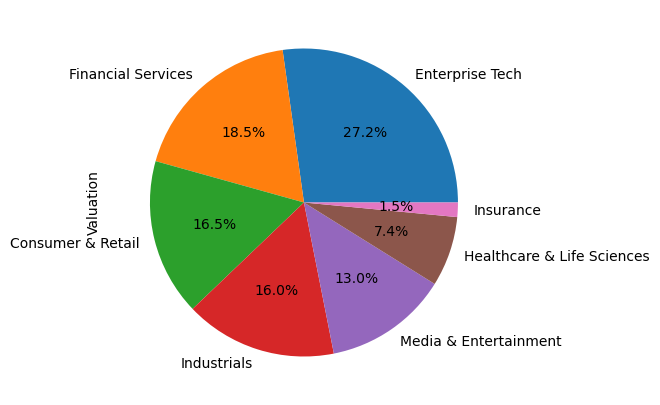

In [19]:
#Valuation Based on Industry
unicorn_df.groupby('Industry')['Valuation'].sum().sort_values(ascending=False).plot.pie(figsize=(5,5),autopct="%1.1f%%")
plt.show()

**Interpretation**:
- Above chart shows that most of unicorns are from  Enterprise Tech Industry and least number of unicorns are form Insurance Industry

In [20]:
#countries with unicorns
countries_with_number_of_unicorns = unicorn_df.groupby("Country")["Company"].count().sort_values(ascending=False).to_frame().reset_index()
countries_with_number_of_unicorns.head()

,Country,Company
0,United States,655
1,China,172
2,India,70
3,United Kingdom,52
4,Germany,30


In [21]:
#plotting top 5 Countries having highest number of unicorn Companies

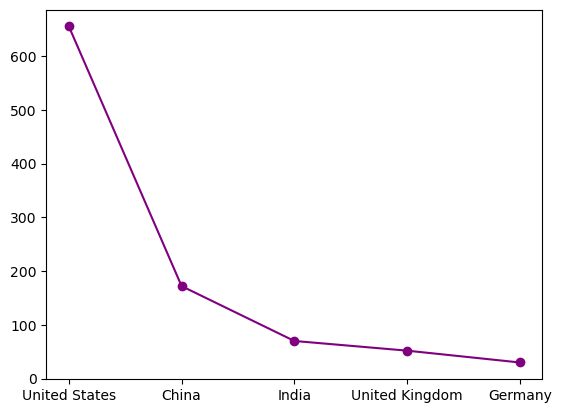

In [22]:
plt.plot(countries_with_number_of_unicorns["Country"].head(),countries_with_number_of_unicorns["Company"].head(),marker="o",color = "purple")
plt.show()

**Interpretation**:
- United States lead in number of unicorn Companies in the world

In [23]:
#finding which city has most number of unicorn companies in United States
United_state=unicorn_df[unicorn_df["Country"]=="United States"]

United_state_city=United_state.groupby("City")["Company"].count().sort_values(ascending=False).reset_index()

United_state_city.head()

,City,Company
0,San Francisco,171
1,New York,118
2,Palo Alto,21
3,Boston,21
4,Mountain View,16


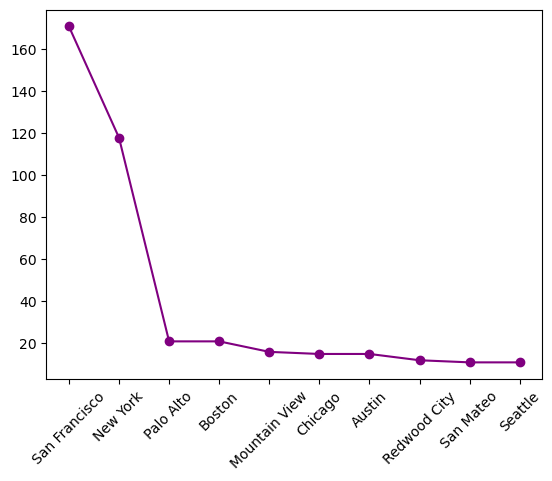

In [24]:
#plotting top 10 Companies of United States cities
plt.plot(United_state_city["City"].head(10),United_state_city["Company"].head(10),marker="o",color = "purple")
plt.xticks(rotation=45)
plt.show()

**Interpretation**:
- In United States, city San Francisco has highest number of unicorn companies followed by New York followed by New York followed by Palo Alto and so on....

In [25]:
#Contribution of Countries in different Industries
Industries_with_country=unicorn_df.groupby("Industry")["Country"].nunique()
Industries_with_country

Industry
Consumer & Retail             30
Enterprise Tech               29
Financial Services            33
Healthcare & Life Sciences    12
Industrials                   27
Insurance                      7
Media & Entertainment         15
Name: Country, dtype: int64

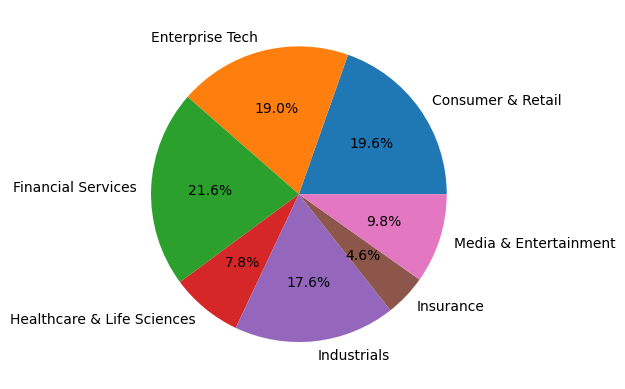

In [26]:
plt.pie(Industries_with_country,autopct="%0.01f%%",labels=Industries_with_country.index)
plt.show()

**Interpretation**:
- From above chart we Interpret that most of countries contributed in Finance Sector and in Insurance sector less countries had contributed

In [27]:
#investors who invest in multiple companies

In [28]:
invest_in_company = unicorn_df.groupby("Investors")["Company"].nunique()

In [29]:
invest_in_multiple_company = invest_in_company[invest_in_company>1].to_frame().reset_index()
invest_in_multiple_company.rename(columns={"Company":"No_of_company_invest"})

,Investors,No_of_company_invest
0,Andreessen Horowitz,2
1,"Bain Capital Ventures, Splunk Ventures, Cisco ...",2
2,FTV Capital,2
3,General Atlantic,3
4,"Global Founders Capital, Shea Ventures, Greycroft",2
5,"Greylock Partners, Google Ventures, BlackRock",2
6,"Insight Partners, Sequoia Capital, Index Ventures",2
7,"Pelion Venture Partners, Foundation Capital, T...",2
8,"Qualcomm Ventures, Accel, Canaan Partners",2
9,Sequoia Capital,3


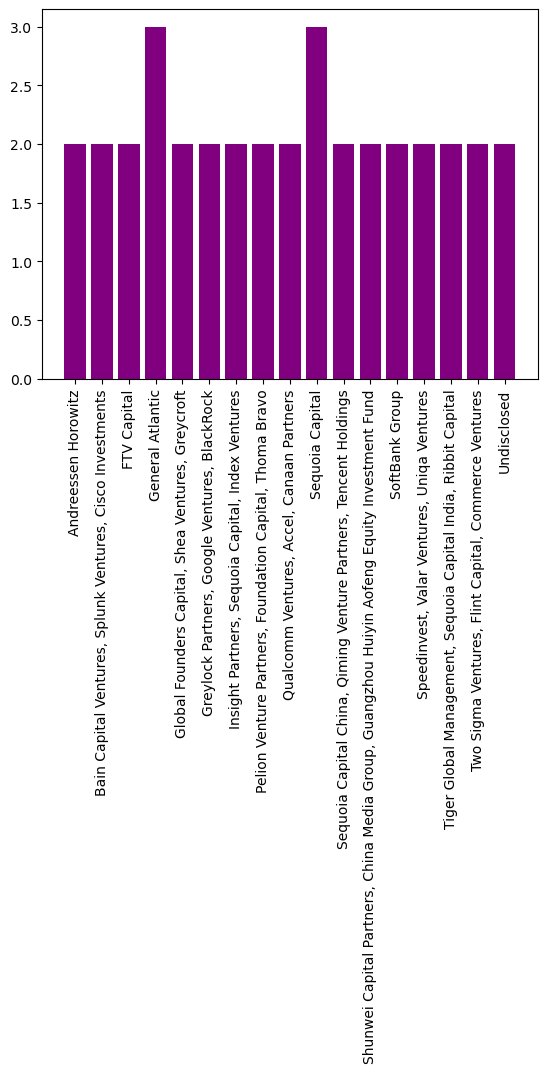

In [30]:
plt.bar(invest_in_multiple_company["Investors"],invest_in_multiple_company["Company"],color = "purple")
plt.xticks(rotation=90)
plt.show()

**Interpretation**:
- Here we can see that Investors named General Atlantic and Sequoia Capital had invested in more than Two companies

In [31]:
#Investors Contribution in different Industry
Industrywise_investor=unicorn_df.groupby("Industry")["Investors"].nunique()

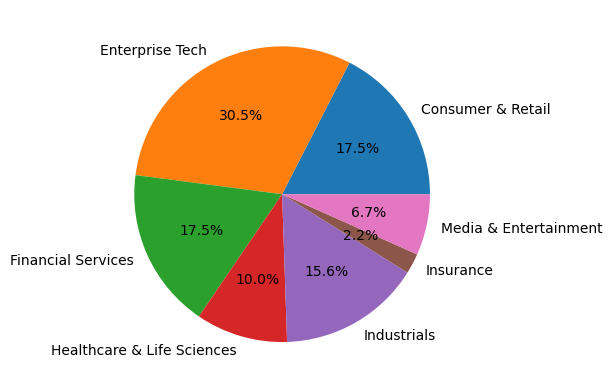

In [32]:
plt.pie(Industrywise_investor.values,labels=Industrywise_investor.index,autopct="%0.1f%%")
plt.show()

**Interpretation**:
- Above chart shows that most of investors invest in Enterprise Tech Company
- In Consumer&Retail and Financial Services there are equal number of investors
- In Insurance company least number of investors have invest

In [33]:
#Changes in Number of Industries as per year
unicorn_df["year"]=unicorn_df["Date Joined"].dt.year

industry_yearwise = unicorn_df.groupby("year")["Industry"]

In [34]:
industry_yearwise.count()

year
2007      1
2011      1
2012      4
2013      3
2014     12
2015     32
2016     20
2017     42
2018     95
2019     97
2020    104
2021    516
2022    261
2023     31
Name: Industry, dtype: int64

**Interpretation**:
- We can see that as year passes the number of Industries also changes and in year 2021 there is highest number of Industries Joined

In [35]:
#Changes in Number of Industries as per year
Countrywise_year = unicorn_df.groupby("Country")["year"].nunique().sort_values(ascending=False).to_frame()

Countrywise_year.head()

,year
Country,
United States,12
China,10
United Kingdom,8
France,7
India,7


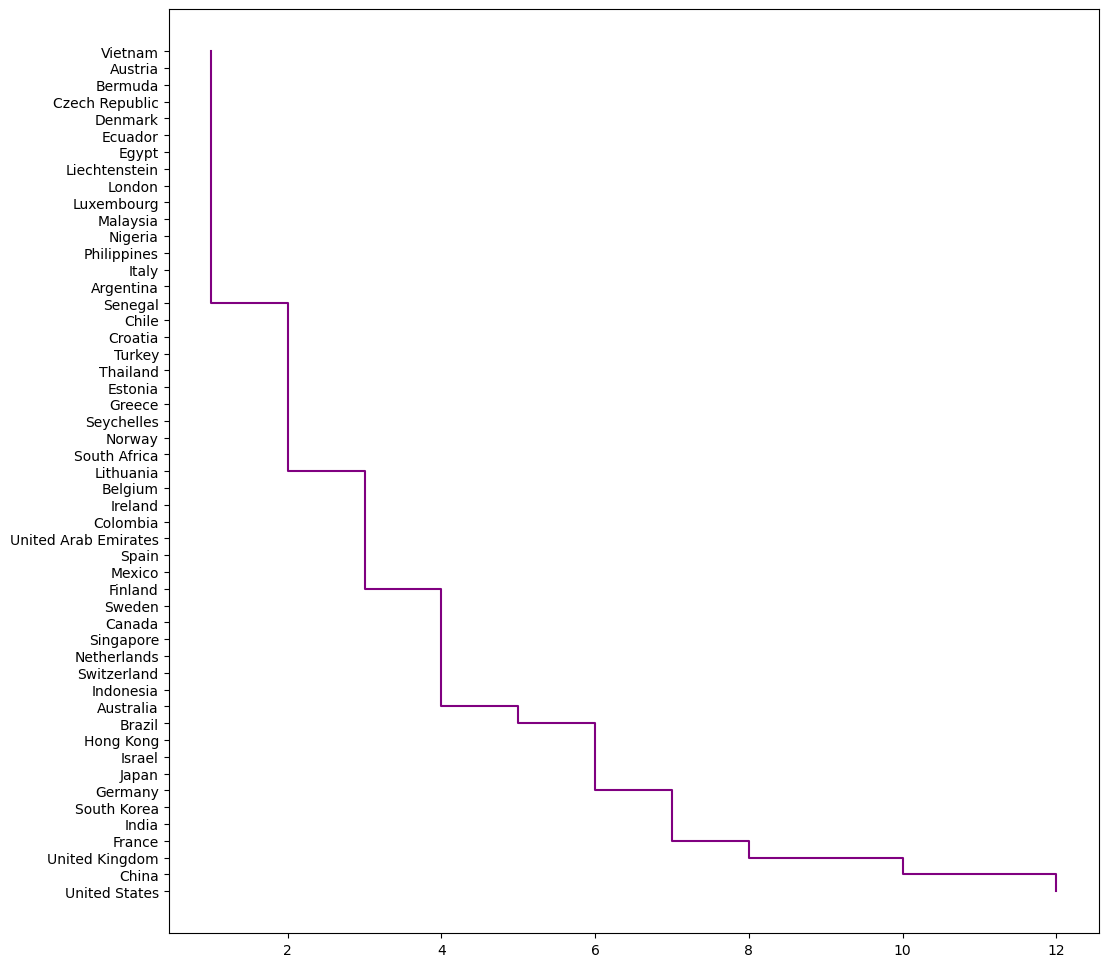

In [36]:
plt.figure(figsize=(12,12))
plt.step(Countrywise_year,Countrywise_year.index,color = "purple")
plt.show()

**Interpretation**:
- Above stepplot indicate that most of countries had invested for single year while only United States is only successfull country had invested in all years according to dataset

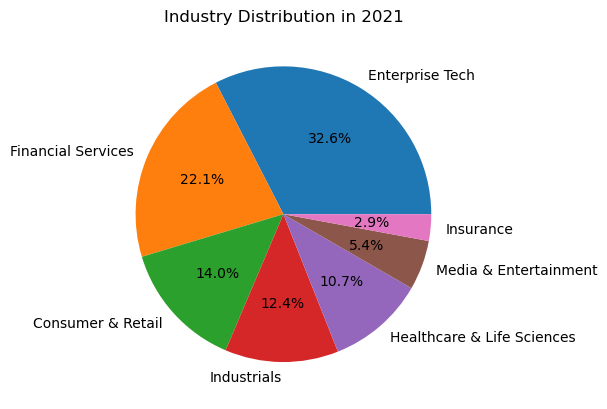

In [37]:
#Plotting Industries for year 2021

# Filter the data for the year 2021
year_2021_data = unicorn_df[unicorn_df["year"] == 2021]

# Group the filtered data by Industry and calculate the count of occurrences
industry_counts_2021 = year_2021_data["Industry"].value_counts()

# Create a pie chart for the industry distribution in 2021
plt.pie(industry_counts_2021, labels=industry_counts_2021.index, autopct="%1.1f%%")
plt.title("Industry Distribution in 2021")
plt.show()


**Interpretation**:
- In Insurance Sector there is least number of Industries while in Enterprise Tech sector ther is most number of Industries

In [38]:
Indian_unicorn= unicorn_df[unicorn_df["Country"] == "India"]
Indian_unicorn.head()

,Company,Valuation,Date Joined,Country,City,Industry,Investors,year
35,BYJU's,11.5,2017-07-25,India,Bengaluru,Consumer & Retail,"Tencent Holdings, Lightspeed India Partners, S...",2017
60,OYO Rooms,9.0,2018-09-25,India,Gurugram,Consumer & Retail,"SoftBank Group, Sequoia Capital India, Lightsp...",2018
75,Swiggy,8.0,2018-06-21,India,Bengaluru,Consumer & Retail,"Accel India, SAIF Partners, Norwest Venture Pa...",2018
76,Dream11,8.0,2019-04-09,India,Mumbai,Media & Entertainment,"Kaalari Capital, Tencent Holdings, Steadview C...",2019
84,Razorpay,7.5,2020-10-11,India,Bengaluru,Financial Services,"Sequoia Capital India, Tiger Global Management...",2020


In [39]:
#Count total number of Unicorn companies listed in India
Indian_unicorn["Company"].count()

70

**Interpretation**:
- There are total 70 unicorn companies listed in India

In [40]:
#Last unicorn company in India
Indian_unicorn.iloc[Indian_unicorn['Date Joined'].argmax()]

Company                                        boAT
Valuation                                       1.4
Date Joined                     2022-10-28 00:00:00
Country                                       India
City                                         Mumbai
Industry                          Consumer & Retail
Investors      Qualcomm Ventures, Fireside Ventures
year                                           2022
Name: 721, dtype: object

**Interpretation**:
- According to dataset boAT was the last unicorn company with Valuation of 1.4$ that joined on 28/10/2022

In [41]:
yearwise_company = Indian_unicorn.groupby("year")["Company"].count().reset_index().rename(columns={"Company":"No_of_company_listed"})

yearwise_company

,year,No_of_company_listed
0,2014,3
1,2017,1
2,2018,3
3,2019,5
4,2020,7
5,2021,33
6,2022,18


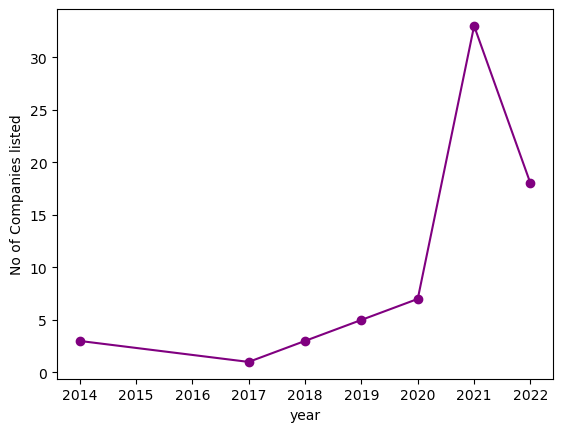

In [42]:
plt.plot(yearwise_company["year"],yearwise_company["No_of_company_listed"],marker="o",color = "purple")
plt.xlabel("year")
plt.ylabel("No of Companies listed")
plt.show()

**Interpretation**:
- In the year 2021 highest number of companies are listed and in year 2017 least number of companies are listed

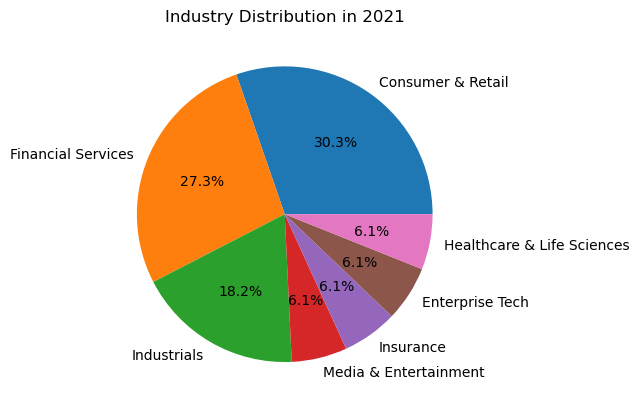

In [43]:
# Filter the data for the year 2021
year_2021 = Indian_unicorn[Indian_unicorn["year"]==2021]

# Group the filtered data by Industry and calculate the count of occurrences
industry_counts_year_2021 = year_2021["Industry"].value_counts()

# # Create a pie chart for the industry distribution in 2021
plt.pie(industry_counts_year_2021, labels=industry_counts_year_2021.index, autopct="%1.1f%%")
plt.title("Industry Distribution in 2021")
plt.show()


**Interpretation**:

    1) In consumer & Retail sector highest number of companies listed i.e.30.3% in year 2021
    
    2) we can say least or equal number of companies listed in following sectors with 6.1% in year 2021
   - Healthsector & Life Sciences
   - Enterprise Tech
   - Insurance
   - Media & Entertainment

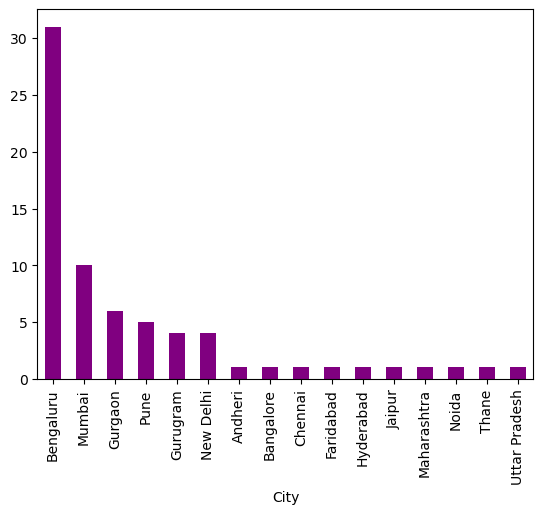

In [44]:
#Citywise unicorn companies in India
citywiseunicorn=Indian_unicorn.groupby("City")["Company"].count().sort_values(ascending = False)
citywiseunicorn.plot(kind="bar",color = "purple")
plt.show()

**Interpretation**:
- Bengaluru has maximum registered unicorn companies in India i.e.31 followed by Mumbai with 10 unicorn companies and so on..

In [45]:
top_5_valuation=Indian_unicorn.nlargest(5,"Valuation")
top_5_valuation

,Company,Valuation,Date Joined,Country,City,Industry,Investors,year
35,BYJU's,11.5,2017-07-25,India,Bengaluru,Consumer & Retail,"Tencent Holdings, Lightspeed India Partners, S...",2017
60,OYO Rooms,9.0,2018-09-25,India,Gurugram,Consumer & Retail,"SoftBank Group, Sequoia Capital India, Lightsp...",2018
75,Swiggy,8.0,2018-06-21,India,Bengaluru,Consumer & Retail,"Accel India, SAIF Partners, Norwest Venture Pa...",2018
76,Dream11,8.0,2019-04-09,India,Mumbai,Media & Entertainment,"Kaalari Capital, Tencent Holdings, Steadview C...",2019
84,Razorpay,7.5,2020-10-11,India,Bengaluru,Financial Services,"Sequoia Capital India, Tiger Global Management...",2020


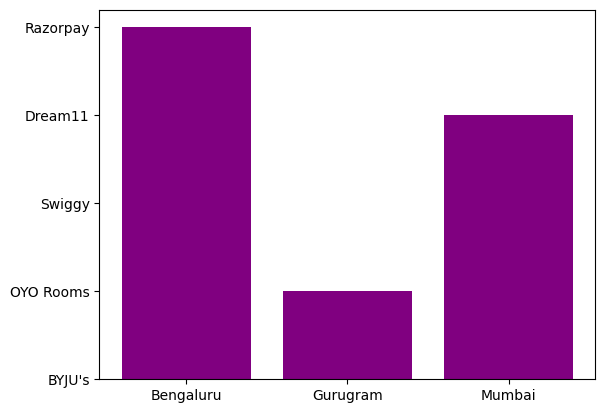

In [46]:
plt.bar(top_5_valuation["City"],top_5_valuation["Company"],color = "purple")
plt.show()

**Interpretation**: Among top 5 high valued companies From Bengaluru there are 3 companies and one from Mumbai and Gurugram each

In [47]:
#company having valuation greater than 10
Valuation_10=Indian_unicorn[Indian_unicorn["Valuation"]>10]
Valuation_10

,Company,Valuation,Date Joined,Country,City,Industry,Investors,year
35,BYJU's,11.5,2017-07-25,India,Bengaluru,Consumer & Retail,"Tencent Holdings, Lightspeed India Partners, S...",2017


**Interpretation**:
- There is only company listed with valueation greater than 10 that is BYJU's with valuation of 11.5

In [48]:
Investor_in_Industry = Indian_unicorn.groupby("Industry")["Investors"].count().reset_index().sort_values(by="Investors",ascending=False)
Investor_in_Industry

,Industry,Investors
0,Consumer & Retail,26
2,Financial Services,15
4,Industrials,11
1,Enterprise Tech,7
6,Media & Entertainment,6
5,Insurance,3
3,Healthcare & Life Sciences,2


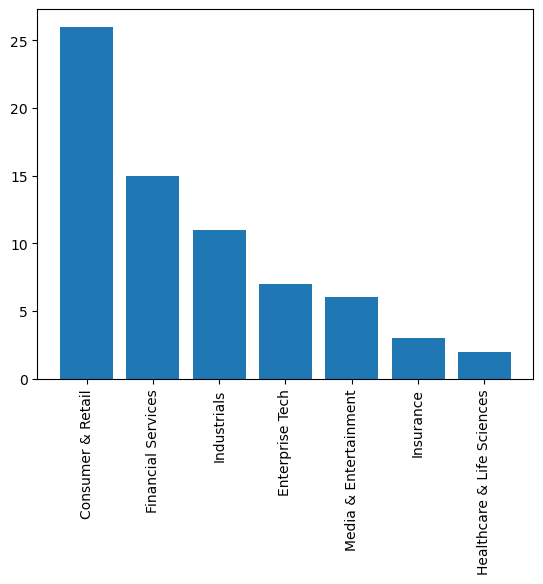

In [49]:
plt.bar(Investor_in_Industry["Industry"],Investor_in_Industry["Investors"])
plt.xticks(rotation=90)
plt.show()

**Interpretation**:
- From above bar chart we interpret thta most of unicorn companies in India are from Consumer & Retail sector while in HealthCare & Life Sciences there are minimum number of companies

In [50]:
#finding average valuation in Each Industry
average_valuation=Indian_unicorn.groupby("Industry")["Valuation"].mean()
average_valuation

Industry
Consumer & Retail             2.690769
Enterprise Tech               1.328571
Financial Services            3.080000
Healthcare & Life Sciences    1.450000
Industrials                   3.049091
Insurance                     2.500000
Media & Entertainment         4.058333
Name: Valuation, dtype: float64

**Interpretation**:
- Media & Entertainment,Financial Services,and Industrials stand out with higher average valuations

## Summary


- Dataset has 1219 rows and 7 columns
- Dataset has 1 numerical and 5 categorical columns and also one datetime column

    
- Top 5 companies which has highest valuation are

    1) ByteDance with valuation of 225$
    
    2)SpaceX with valuation of 137$
    
    3)SHEIN with valuation of 66$
    
    4)Stripe with valuation of 50$
    
    5)Canva with valuation of 40$
    

- ByteDance company has highest valuation.


- Media&Entertainment has highest average Valuation among all industries.


- Most of unicorns are from  Enterprise Tech Industry and least number of unicorns are from Insurance Industry.


- United States lead in number of unicorn Companies in world.


- In United States, city San Francisco has highest number of unicorn companies followed by New York followed by New York           followed by Palo Alto and so on....


- Most of countries contributed in Finance Sector and in Insurance sector less countries had contributed.


- Only Investors named General Atlantic and Sequoia Capital had invested in more than Two companies.


- Most of investors invest in Enterprise Tech Company.


- In Consumer&Retail and Financial Services there are equal number of investors.


- In Insurance company least number of investors have invest.


- We can see that as year passes the number of Industries also changes and in year 2021 there is highest number of Industries     Joined.


- From stepplot we interpret that most of countries had invested for single year while only United States is only successfull     country had invested in all years according to dataset.


- In Insurance Sector there is least number of Industries while in Enterprise Tech sector there are most number of Industries.


- There are total 70 unicorn companies listed in India.


- According to dataset boAT was the last unicorn company with Valuation of 1.4$ that joined on 28/10/2022.


- In the year 2021 highest number of companies are listed and in year 2017 least number of companies are listed

    1) In consumer & Retail sector highest number of companies listed i.e.30.3% in year 2021.
    
    2) we can say least or equal number of companies listed in following sectors with 6.1% in year 2021.
   - Healthsector & Life Sciences
   - Enterprise Tech
   - Insurance
   - Media & Entertainment


- Bengaluru has maximum registered unicorn companies in India i.e.31 followed by Mumbai with 10 unicorn companies and so on..


- Among top 5 high valued companies From Bengaluru there are 3 companies and one from Mumbai and Gurugram each.


- There is only company listed with valuation greater than 10 that is BYJU's with valuation of 11.5


- Most of unicorn companies in India are from Consumer & Retail sector while in HealthCare & Life Sciences there are minimum       number of companies.


- Media & Entertainment,Financial Services,and Industrials stand out with higher average valuations.




<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Continue Implementation and Learning........
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>